In [1]:
import os
import cv2
import torch
import numpy as np

In [4]:
class Dogs_Cats():
    CATS = "pets/cats"
    DOGS = "pets/dogs"
    
    SIZE = 50

    LABELS = {CATS:0, DOGS:1}
    training_data = []

    catCount = 0
    dogCount = 0  

    def make_training_data(self):
        for label in self.LABELS:
            print(label)
            for f in os.listdir(label):
                try:
                    path = os.path.join(label, f)
                    img = cv2.imread(path, 0)
                    img = cv2.resize(img, (self.SIZE, self.SIZE))
                    self.training_data.append([np.array(img), np.eye(2)[self.LABELS[label]]])

                    if label == self.CATS:
                        self.catCount += 1
                    elif label == self.DOGS:
                        self.dogCount += 1
                except:
                    pass
        np.random.shuffle(self.training_data)
        np.save("training_data.npy", self.training_data)
        print(f"Cats: {self.catCount}")
        print(f"Dogs: {self.dogCount}")

In [5]:
dogs_cats = Dogs_Cats()
dogs_cats.make_training_data()

pets/cats
pets/dogs
Cats: 12476
Dogs: 12470


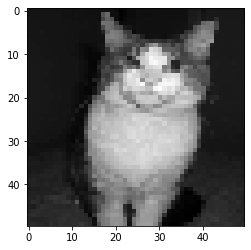

In [7]:
import matplotlib.pyplot as plt

data = np.load("training_data.npy", allow_pickle=True)
plt.imshow(data[1][0], cmap="gray")
plt.show()

In [8]:
data[1][1]

array([1., 0.])